In [668]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [643]:
# method to read data from excel file
def read_plane_data(file_name):
    df_planes = pd.read_excel(file_name)
    return df_planes

df = read_plane_data('airplane data.xlsx')

print('Here are your plane choices:')
print(df['aircraft_type'])

Here are your plane choices:
0              A220-300
1    Bombardier CRJ-900
Name: aircraft_type, dtype: object


In [644]:
plane_choice = input("Input the number corresponding to the plane you'd like to simulate:")    

Input the number corresponding to the plane you'd like to simulate: 1


In [645]:
plane_type = df.loc[int(plane_choice)].at['aircraft_type']
print('You selected:', plane_type)

You selected: Bombardier CRJ-900


In [646]:
def seat_params_info(df, plane_num):
    """Function to gather information from table regarding seat dimensions and return a list of tuples."""
    seat_width_economy = df.loc[int(plane_num)].at['seat width - economy']
    seat_depth_economy = df.loc[int(plane_num)].at['seat depth - economy']
    seat_param_economy = seat_width_economy, seat_depth_economy

    seat_width_business = df.loc[int(plane_num)].at['seat width - business']
    seat_depth_business = df.loc[int(plane_num)].at['seat depth - business']
    seat_param_business = seat_width_business, seat_depth_business

    seat_width_1stclass = df.loc[int(plane_num)].at['seat width - first class']
    seat_depth_1stclass = df.loc[int(plane_num)].at['seat depth - first class']
    seat_param_1stclass = seat_width_1stclass, seat_depth_1stclass

    seat_params = [seat_param_economy, seat_param_business, seat_param_1stclass]

    return seat_params

seat_params_info(df, plane_choice)

[(17, 31), (21, 37), (nan, nan)]

In [647]:
def num_of_seats_info(df, plane_num):
    """Function to gather information from table regarding number of seats and return a tuple."""
    econ = df.at[int(plane_num), "total seats - economy"]
    bus = df.at[int(plane_num), "total seats - business"]
    first = df.at[int(plane_num), "total seats - first class"]
    
    num_of_seats = econ, bus, first

    return num_of_seats

num_of_seats_info(df, plane_choice)

(64, 12, 0)

In [648]:
def seat_arrange_info(df, plane_num):
    """Function to gather information from table regarding seat arrangement and return a list."""
    seat_arrange_econ = df.loc[int(plane_num)].at['seat arrangement - economy']

    seat_arrange_bus = df.loc[int(plane_num)].at['seat arrangement - business']
    
    seat_arrange_1st = df.loc[int(plane_num)].at['seat arrangement - first class']
    
    seat_arrange = [seat_arrange_econ, seat_arrange_bus, seat_arrange_1st]

    return seat_arrange

seat_arrange_info(df, plane_choice)

['2 2', '1 2', nan]

In [758]:
class Plane(Cell2D):
    def __init__(self, seat_params, num_of_seats, seat_arrange):
        self.seat_param_economy = seat_params[0]
        self.seat_param_business = seat_params[1]
        self.seat_param_firstclass = seat_params[2]

        self.num_of_seats_economy = num_of_seats[0]
        self.num_of_seats_business = num_of_seats[1]
        self.num_of_seats_firstclass = num_of_seats[2]

        self.seat_arrange_economy = seat_arrange[0]
        self.seat_arrange_business = seat_arrange[1]
        self.seat_arrange_firstclass = seat_arrange[2]

    def draw_sect_of_plane(self, ax, seat_type, start_y, aisle_gap=5, padding = 1):
        seats_per_col = seat_type[0]
        seats_per_row = seat_type[1]
        num_rows = seat_type[2]
        seat_width = seat_type[3]
        seat_depth = seat_type[4]
        
        y = start_y
        
        for row in range(num_rows):
            x = 0
            y += seat_depth + padding
            
            for seat in range(seats_per_col[0]):
                rect = patches.Rectangle((x, y), seat_width, seat_depth, edgecolor='black', facecolor='grey')
                ax.add_patch(rect)

                x += seat_width + padding

            #make aisle
            x += aisle_gap

            for seat in range(seats_per_col[2]):
                rect = patches.Rectangle((x, y), seat_width, seat_depth, edgecolor='black', facecolor='grey')
                ax.add_patch(rect)

                x += seat_width + padding

    def draw_plane_find_parameters(self, seat_dims, seat_arrangement, num_of_seats):
        seats_per_col = seat_arrangement.split(' ')
            
        for i, num in enumerate(seats_per_col):
            seats_per_col[i] = int(num)

        dummy_var = seats_per_col[len(seats_per_col)//2]
        seats_per_col[len(seats_per_col)//2] = 0
        seats_per_col.append(dummy_var)
        
        seats_in_row = sum(seats_per_col)
        num_of_rows = math.ceil(num_of_seats/seats_in_row)

        seat_width = seat_dims[0] * 0.2
        seat_depth = seat_dims[1] * 0.2

        return seats_per_col, seats_in_row, num_of_rows, seat_width, seat_depth
    
    def draw_plane(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        current_y = 0
        spacing = 1
        
        # first class seats        
        if self.num_of_seats_firstclass != 0:
            first_class = self.draw_plane_find_parameters(self.seat_param_firstclass, self.seat_arrange_firstclass, self.num_of_seats_firstclass)
            self.draw_sect_of_plane(ax, first_class, current_y, 10, 3)
            current_y += first_class[2] * (first_class[4] + spacing) + 1

            
        # business seats
        if self.num_of_seats_business != 0:
            business_class = self.draw_plane_find_parameters(self.seat_param_business, self.seat_arrange_business, self.num_of_seats_business)
            self.draw_sect_of_plane(ax, business_class, current_y, 5, 2)
            current_y += business_class[2] * (business_class[4] + spacing) + 10
            
        # economy seats
        economy_class = self.draw_plane_find_parameters(self.seat_param_economy, self.seat_arrange_economy, self.num_of_seats_economy)
        
        self.draw_sect_of_plane(ax, economy_class, current_y)
        current_y += economy_class[2] * (economy_class[4] + spacing) + 1 

        plt.axis('equal')
        plt.axis('off')
        plt.show()

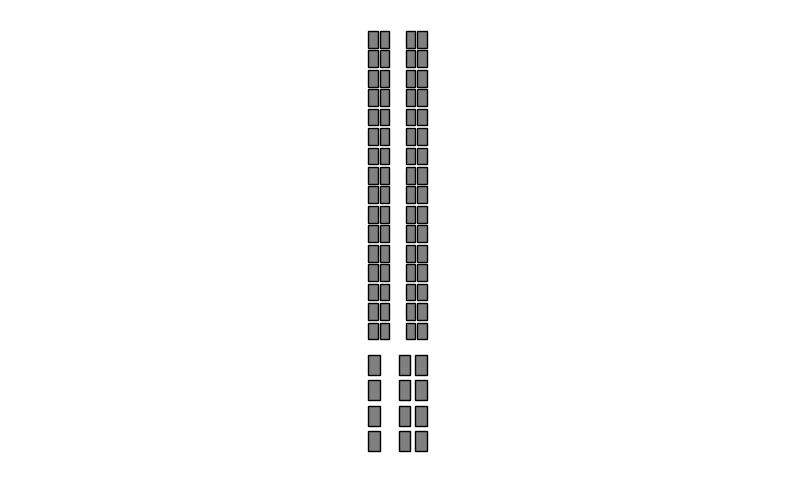

In [760]:
plane = Plane(seat_params_info(df, plane_choice), num_of_seats_info(df, plane_choice), seat_arrange_info(df, plane_choice))

plane.draw_plane()

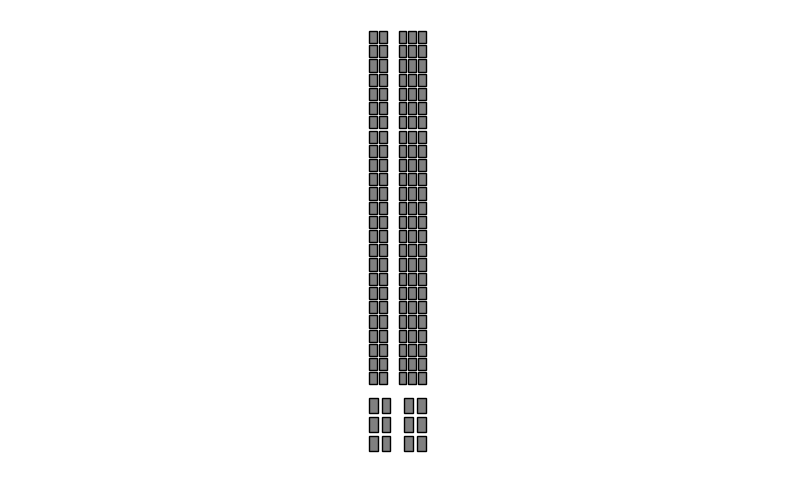

In [762]:
plane = Plane(seat_params_info(df, 0), num_of_seats_info(df, 0), seat_arrange_info(df, 0))

plane.draw_plane()